In [5]:
import numpy as np
import torch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

import sys

def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax, fig


def get_residue_at(i, X):
    oxy = X[i,0,:,:,:]
    npO=np.squeeze(oxy)
    print(npO.shape)

    carb = X[i,1,:,:,:]
    print(carb.shape)
    npC=np.squeeze(carb)

    nitro = X[i,2,:,:,:]
    print(nitro.shape)
    npN=np.squeeze(nitro)

    sulph = X[i,3,:,:,:]
    print(sulph.shape)
    npS=np.squeeze(sulph)
    
    return npO, npC, npN, npS


def plot_grid(npO, npC, npN, npS):
    fig = plt.figure(figsize=(10,15))
    
    ax = fig.add_subplot(141, projection='3d')
    ax.voxels(npO, edgecolors='gray', shade=True)
    ax.set_title('Oxygen')

    ax = fig.add_subplot(142, projection='3d')
    ax.voxels(npC, edgecolors='gray', shade=True)
    ax.set_title('Carbon')

    ax = fig.add_subplot(143, projection='3d')
    ax.voxels(npN, edgecolors='gray', shade=True)
    ax.set_title('Nitrogen')

    ax = fig.add_subplot(144, projection='3d')
    ax.voxels(npS, edgecolors='gray', shade=True)
    ax.set_title('Sulphur')

    plt.show()

In [2]:
import h5py
from store_pytable import getH5column
import tables


def load_voxel_data(filepath):
    h5file = tables.open_file(filepath, mode="r")
    dataColumn = getH5column(h5file, "data")
    labelColumn = getH5column(h5file, "label")
    X=dataColumn[:]
    y=labelColumn[:]
    print('load_voxel_data: ',X.shape,y.shape)
    return X,y


#### Plot residue grid from Wtorng et al. PDB dataset

load_voxel_data:  (6000, 4, 20, 20, 20) (6000,)
(20, 20, 20)
(20, 20, 20)
(20, 20, 20)
(20, 20, 20)


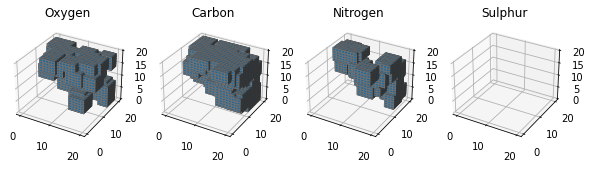

In [31]:
filename = '/home/meghanakshirsagar/azurefiles/projects/folding@home/other_models/russ_altman_lab/data/val_data_1.pytables'
X, y = load_voxel_data(filename)
npO, npC, npN, npS = get_residue_at(50, X)
plot_grid(npO, npC, npN, npS)

#### Plot residue grid from our dataset

In [138]:
ptf_file = 'data/ptf_files/ACE2_frame1.ptf'
#dat_file = 'data/numpy/ACE2_frame1_0.dat'
dat_file = 'data/new_data_october/numpy/SARS-2-nsp10trj_gen001_kid007_frame2_0.dat'
dat_file = 'data/new_data_october/numpy/SARS-2-nsp5-monomer-2trj_gen001_kid000_frame0_0.dat'
    
X=np.load(dat_file,allow_pickle=True)
print(X.shape)
#X = torch.FloatTensor(X[0,0,:,:,:])

#ax, fig = make_ax(True)
#ax.voxels(npX, edgecolors='gray', shade=False)
#plt.show()

#with PdfPages('plots/ACE2.pdf') as pdf:
#    pdf.savefig(fig)

(306, 4, 20, 20, 20)


In [139]:
npO, npC, npN, npS = get_residue_at(50, X)

(20, 20, 20)
(20, 20, 20)
(20, 20, 20)
(20, 20, 20)


(array([7.779e+03, 7.000e+01, 0.000e+00, 1.030e+02, 2.300e+01, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.900e+01, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.01827269, 0.03654539, 0.05481808, 0.07309078,
        0.09136347, 0.10963617, 0.12790886, 0.14618156, 0.16445425,
        0.18272695, 0.20099964, 0.21927234, 0.23754503, 0.25581773,
        0.27409042, 0.29236312, 0.31063581, 0.32890851, 0.3471812 ,
        0.3654539 ]),
 <BarContainer object of 20 artists>)

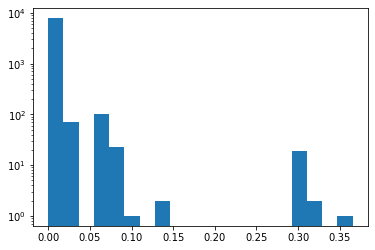

In [140]:
o = npO.reshape(1,8000)
plt.hist(o.tolist(),bins=20,log=True)

In [141]:
def plot_channel(fig, npAtom, idx, atomType):
    ax = fig.add_subplot(idx, projection='3d')
    x, y, z = npAtom.nonzero()
    if x.shape[0] > 500:
        npAtom[npAtom<0.1]=0
        x, y, z = npAtom.nonzero()
    c = npAtom[x,y,z]
    print(c.shape,max(c),min(c))
    img = ax.scatter(x, y, z, c=c, cmap=cm.get_cmap('Blues'), alpha=0.8)
    #fig.colorbar(img, shrink=0.5)
    ax.set_title(atomType)


(24,) 0.3654539 0.14587837
(153,) 0.4800079 0.10026726
(31,) 0.36609253 0.109314285
(213,) 0.2925147 1.6900765e-08


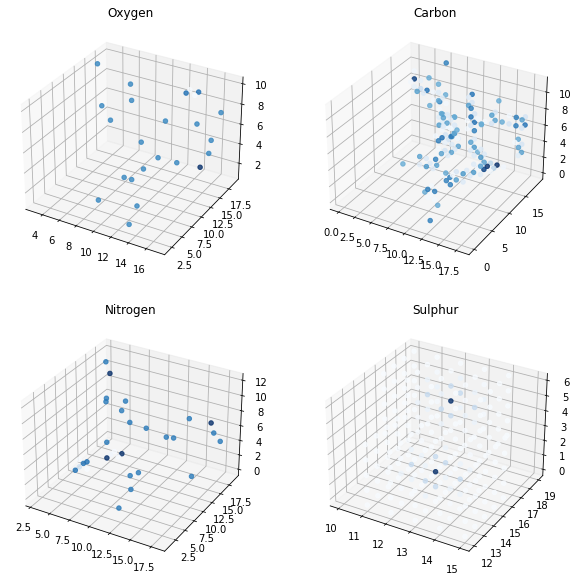

In [142]:
from matplotlib import cm

fig = plt.figure(figsize=(10,10))

plot_channel(fig, npO, 221, 'Oxygen')
plot_channel(fig, npC, 222, 'Carbon')
plot_channel(fig, npN, 223, 'Nitrogen')
plot_channel(fig, npS, 224, 'Sulphur')

plt.show()

In [143]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('3D_CNN_grid_channels.pdf') as pdf:
    pdf.savefig(fig)

(20, 20, 20)
(20, 20, 20)
(20, 20, 20)
(20, 20, 20)


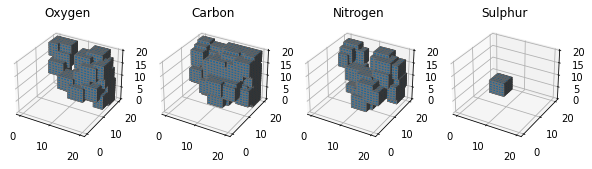

In [51]:
npO, npC, npN, npS = get_residue_at(1, X)
plot_grid(npO, npC, npN, npS)

(20, 20, 20)
(20, 20, 20)
(20, 20, 20)
(20, 20, 20)


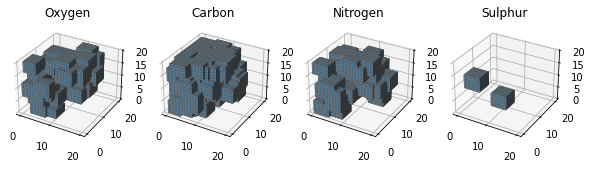

In [42]:
npO, npC, npN, npS = get_residue_at(2, X)
plot_grid(npO, npC, npN, npS)

In [54]:
print(list(zip(x,y,z))[0:50])


[(3, 12, 2), (3, 12, 3), (3, 12, 4), (3, 12, 5), (3, 12, 6), (3, 13, 2), (3, 13, 3), (3, 13, 4), (3, 13, 5), (3, 13, 6), (3, 14, 2), (3, 14, 3), (3, 14, 4), (3, 14, 5), (3, 14, 6), (3, 15, 2), (3, 15, 3), (3, 15, 4), (3, 15, 5), (3, 15, 6), (3, 16, 2), (3, 16, 3), (3, 16, 4), (3, 16, 5), (3, 16, 6), (4, 12, 2), (4, 12, 3), (4, 12, 4), (4, 12, 5), (4, 12, 6), (4, 13, 2), (4, 13, 3), (4, 13, 4), (4, 13, 5), (4, 13, 6), (4, 14, 2), (4, 14, 3), (4, 14, 4), (4, 14, 5), (4, 14, 6), (4, 15, 2), (4, 15, 3), (4, 15, 4), (4, 15, 5), (4, 15, 6), (4, 16, 2), (4, 16, 3), (4, 16, 4), (4, 16, 5), (4, 16, 6)]
